In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import pandas as pd

In [4]:
dataset = pd.read_csv('Data/dataset_spine_clean.csv')

In [38]:
dataset.columns

Index(['Unnamed: 0', 'pelvic_incidence', 'pelvic tilt',
       'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius',
       'degree_spondylolisthesis', 'pelvic_slop', 'Direct_tilt',
       'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope',
       'label', 'label_val'],
      dtype='object')

Building our train and test datasets

In [39]:
X = pd.DataFrame(
        dataset.drop(axis=1, labels=['label', 'label_val']),
        columns=dataset.columns[:-2])

In [40]:
y = dataset.label_val

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=1)

We split our data in $\approx 33\%$ for validation and $\approx 66\%$ for training

In [42]:
len(X_test) / len(X_train)

0.33620689655172414

## First Model
- **activation function**: relu
- **solver for weight optimization:** Adam
- **L2 penalty for regularization**: 0.0001
- **Batch_size**: min(200,n_samples)
- **hidden layers sizes**: (100,)
- **Number of layers**: 3
- **learning rate**: constant equal to 0.001
- **epochs** = 30

In [55]:
model1 = MLPClassifier(random_state=1, max_iter=30,verbose=True).fit(X_train, y_train)



Iteration 1, loss = 3.15757097
Iteration 2, loss = 1.28529423
Iteration 3, loss = 1.05462438
Iteration 4, loss = 0.49655784
Iteration 5, loss = 0.49332250
Iteration 6, loss = 0.51035197
Iteration 7, loss = 0.34932612
Iteration 8, loss = 0.19186984
Iteration 9, loss = 0.13699492
Iteration 10, loss = 0.13840442
Iteration 11, loss = 0.12908075
Iteration 12, loss = 0.10141425
Iteration 13, loss = 0.07866260
Iteration 14, loss = 0.07066033
Iteration 15, loss = 0.06856962
Iteration 16, loss = 0.06867723
Iteration 17, loss = 0.06571432
Iteration 18, loss = 0.05955718
Iteration 19, loss = 0.05438876
Iteration 20, loss = 0.04970770
Iteration 21, loss = 0.04710825
Iteration 22, loss = 0.04507265
Iteration 23, loss = 0.04327227
Iteration 24, loss = 0.04166162
Iteration 25, loss = 0.04028208
Iteration 26, loss = 0.03886659
Iteration 27, loss = 0.03797491
Iteration 28, loss = 0.03641007
Iteration 29, loss = 0.03512798
Iteration 30, loss = 0.03482672


C:\Users\novae\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
model1.score(X_test, y_test)


0.9871794871794872

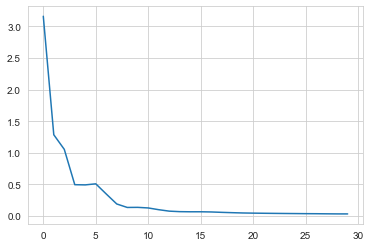

In [57]:
plt.plot(model1.loss_curve_)
plt.show()

In [58]:
y_pred = model1.predict(X_test)

Text(0.5, 16.0, 'Predicted Label')

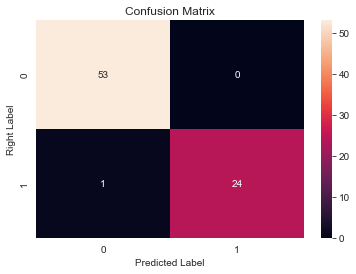

In [59]:
confMatrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(
        pd.DataFrame(confMatrix),
        annot=True
)
plt.title("Confusion Matrix")
plt.ylabel("Right Label")
plt.xlabel("Predicted Label")

Most detailed description of the model

In [62]:
model1.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 30,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}